In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

In [2]:
tr_d = pd.read_csv('/home/antirrabia/Documents/DeepLearnin/DATASETS/HousePrices/train.csv')
te_d = pd.read_csv('/home/antirrabia/Documents/DeepLearnin/DATASETS/HousePrices/test.csv')

In [3]:
tr_d.shape, te_d.shape

((1460, 81), (1459, 80))

### Getting the columns that have nan

In [4]:
# Training and Test missing values
tr_m = set( tr_d.columns[ tr_d.isna().sum()>0 ] )
te_m = set( te_d.columns[ te_d.isna().sum()>0 ] )

In [5]:
# Finding columns that are just in training set
tr_m - te_m

{'Electrical'}

In [6]:
# Finding columns that are just in test set
te_m - tr_m

{'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'Exterior1st',
 'Exterior2nd',
 'Functional',
 'GarageArea',
 'GarageCars',
 'KitchenQual',
 'MSZoning',
 'SaleType',
 'TotalBsmtSF',
 'Utilities'}

In [7]:
# Finding the common columns
tr_m.intersection(te_m)

{'Alley',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'Fence',
 'FireplaceQu',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'LotFrontage',
 'MasVnrArea',
 'MasVnrType',
 'MiscFeature',
 'PoolQC'}

In [8]:
# Counting the nan's in each column
# and see the columns that have a big ratio
common_m = ['Alley','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2', 'BsmtQual','Fence',
            'FireplaceQu','GarageCond','GarageFinish', 'GarageQual', 'GarageType','GarageYrBlt',
            'LotFrontage','MasVnrArea', 'MasVnrType', 'MiscFeature','PoolQC']

tr_d[common_m].isna().sum().sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageQual        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
MasVnrArea         8
MasVnrType         8
dtype: int64

In [9]:
# Missing values in the Test Set
te_d[common_m].isna().sum().sort_values(ascending=False)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
dtype: int64

In [10]:
# PoolQC      nan 99% = no pool 
# MiscFeature nan 96% = no misc feature
# Alley       nan 93% = no alley access
# Fence       nan 80% = no Fence
# FireplaceQu nan 47% = no FirePlace
# GarageType  nan  6% = no garage
# GarageFinish nan 6% = no garage
# GarageQual  nan  6% = no garage
# GarageCond  nan  6% = no garage
# BsmtFinType2 nan 3% = no basement
# BsmtFinType1 nan 3% = no basement
# BsmtCond    nan  3% = no basement
# BsmtQual    nan  3% = no basement
# BsmtExposure nan 3% = no basement (This already has a category 'NO')
# MasVnrType hast category = none(864 most common)


# GarageYrBlt nan = fill with 0

# Electrical hast category = SBrkr(1334 most common)
# 

# Numerical
# LotFrontage nan 17% = 
# MasVnrArea  nan  1% = 

with_none = ['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Fence', 'FireplaceQu', 
           'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'MasVnrType', 'MiscFeature', 'PoolQC']

In [11]:
# Imputing
tr_d[with_none] = tr_d[with_none].fillna('None')
te_d[with_none] = te_d[with_none].fillna('None')

In [12]:
# Updating Common columns

set(common_m) - set(with_none)

{'GarageYrBlt', 'LotFrontage', 'MasVnrArea'}

In [13]:
common_m = ['GarageYrBlt', 'LotFrontage', 'MasVnrArea']
common_m

['GarageYrBlt', 'LotFrontage', 'MasVnrArea']

In [14]:
# Imputing with the median from each Neighborhood
tr_d['LotFrontage'] = ( tr_d.groupby('Neighborhood')['LotFrontage']
                       .transform( lambda x: x.fillna( x.median() )) )

te_d['LotFrontage'] = ( te_d.groupby('Neighborhood')['LotFrontage']
                       .transform( lambda x: x.fillna( x.median() )) )

In [15]:
# Imputing with the median from each Neighborhood
tr_d['GarageYrBlt'] = ( tr_d.groupby('Neighborhood')['GarageYrBlt']
                       .transform( lambda x: x.fillna( x.median() )) )

te_d['GarageYrBlt'] = ( te_d.groupby('Neighborhood')['GarageYrBlt']
                       .transform( lambda x: x.fillna( x.median() )) )

In [16]:
# Updating missing values
tr_m = set( tr_d.columns[ tr_d.isna().sum() > 0 ] )
te_m = set( te_d.columns[ te_d.isna().sum() > 0 ] )

# Any common column with missing values
tr_m.intersection(te_m)

{'MasVnrArea'}

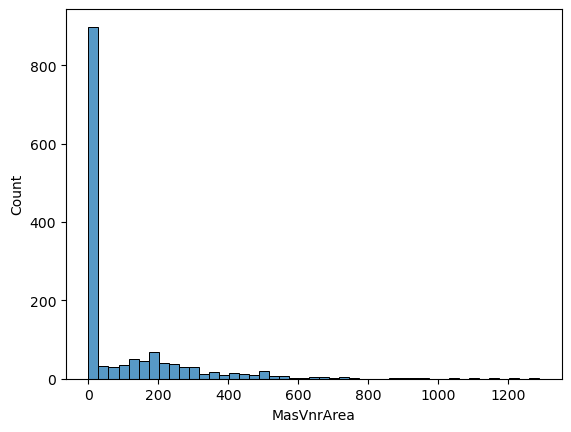

In [17]:
# Taking a look of the distribution
sns.histplot(data=te_d, x='MasVnrArea');

In [18]:
# number of missing values in Training and Test sets
tr_d['MasVnrArea'].isna().sum(), te_d['MasVnrArea'].isna().sum()

(8, 15)

In [19]:
# Taking a look at the rows that MasVnrArea is nan
pd.set_option('display.max_columns', None)
tr_d[ tr_d['MasVnrArea'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,65.0,7851,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,None,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,None,None,None,0,5,2010,WD,Normal,216500
529,530,20,RL,74.0,32668,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,None,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2,484,TA,TA,Y,0,0,200,0,0,0,None,None,None,0,3,2007,WD,Alloca,200624
650,651,60,FV,65.0,8125,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,None,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,Ex,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,None,Attchd,2007.0,RFn,2,562,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,5,2008,WD,Normal,205950
936,937,20,RL,67.0,10083,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,None,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,0,343,1176,GasA,Ex,Y,SBrkr,1200,0,0,1200,1,0,2,0,2,1,Gd,5,Typ,0,None,Attchd,2003.0,RFn,2,555,TA,TA,Y,0,41,0,0,0,0,None,None,None,0,8,2009,WD,Normal,184900
973,974,20,FV,95.0,11639,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,None,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1428,1428,GasA,Ex,Y,SBrkr,1428,0,0,1428,0,0,2,0,3,1,Gd,6,Typ,0,None,Attchd,2007.0,Fin,2,480,TA,TA,Y,0,120,0,0,0,0,None,None,None,0,12,2008,New,Partial,182000
977,978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106,Unf,0,135,1241,GasA,Ex,Y,SBrkr,1241,0,0,1241,1,0,1,1,1,1,Gd,4,Typ,0,None,Attchd,2007.0,Fin,2,569,TA,TA,Y,0,116,0,0,0,0,None,None,None,0,11,2007,New,Partial,199900
1243,1244,20,RL,107.0,13891,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386,Unf,0,690,2076,GasA,Ex,Y,SBrkr,2076,0,0,2076,1,0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3,850,TA,TA,Y,216,229,0,0,0,0,None,None,None,0,9,2006,New,Partial,465000
1278,1279,60,RL,75.0,9473,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,None,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804,Unf,0,324,1128,GasA,Ex,Y,SBrkr,1128,903,0,2031,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2,577,TA,TA,Y,0,211,0,0,0,0,None,None,None,0,3,2008,WD,Normal,237000


In [20]:
# Exploring how the mean behaves in each Neighborhood
tr_d.groupby('Neighborhood')['MasVnrArea'].describe()

,count,mean,std,min,25%,50%,75%,max
Neighborhood,,,,,,,,
Blmngtn,17.0,45.588235,47.257352,0.0,16.0,18.0,72.00,145.0
Blueste,2.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
BrDale,16.0,307.562500,127.843117,127.0,235.0,291.0,377.25,604.0
BrkSide,58.0,7.396552,32.447496,0.0,0.0,0.0,0.00,161.0
ClearCr,28.0,84.571429,165.331861,0.0,0.0,0.0,90.00,621.0
CollgCr,149.0,97.879195,120.162048,0.0,0.0,24.0,171.00,573.0
Crawfor,50.0,82.740000,162.196128,0.0,0.0,0.0,68.00,632.0
Edwards,100.0,50.470000,133.216802,0.0,0.0,0.0,12.00,796.0
Gilbert,78.0,42.051282,96.201749,0.0,0.0,0.0,20.50,456.0


In [21]:
# filling nan with the Neighborhood's mean 
# beacuse it vary among Neighborhoods
tr_d['MasVnrArea'] = ( tr_d.groupby('Neighborhood')['MasVnrArea']
                       .transform( lambda x: x.fillna( x.mean() )) )

te_d['MasVnrArea'] = ( te_d.groupby('Neighborhood')['MasVnrArea']
                       .transform( lambda x: x.fillna( x.mean() )) )

In [22]:
# Updating missing values
tr_m = set( tr_d.columns[ tr_d.isna().sum() > 0])
te_m = set( te_d.columns[ te_d.isna().sum() > 0])

tr_m.intersection(te_m)

set()

In [23]:
# No more COMMON columns with nan

In [24]:
# Looking columns with missing value in Training Set
tr_m

{'Electrical'}

In [25]:
# Taking a look at the values
tr_d['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [26]:
# Number of nan
tr_d['Electrical'].isna().sum()

1

In [27]:
# Taking a look at the whole row
pd.set_option('display.max_columns', None)
tr_d[ tr_d['Electrical'].isna() ]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,None,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,None,None,None,0,5,2008,WD,Normal,167500


In [28]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Taking a look at all houses to see if there is any
# feature that tells you something
tr_d[ tr_d['Neighborhood'].isin(['Timber']) ]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
41,42,20,RL,115.0,16905,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,5,6,1959,1959,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,Gd,BLQ,967,Unf,0,383,1350,GasA,Gd,Y,SBrkr,1328,0,0,1328,0,1,1,1,2,1,TA,5,Typ,2,Gd,Attchd,1959.0,RFn,1,308,TA,TA,P,0,104,0,0,0,0,None,None,None,0,7,2007,WD,Normal,170000
133,134,20,RL,85.0,6853,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,136.0,Gd,TA,PConc,Ex,TA,No,GLQ,1005,Unf,0,262,1267,GasA,Ex,Y,SBrkr,1296,0,0,1296,1,0,2,0,2,1,Gd,6,Typ,0,None,Attchd,2001.0,Fin,2,471,TA,TA,Y,192,25,0,0,0,0,None,None,None,0,6,2009,WD,Normal,220000
157,158,60,RL,92.0,12003,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,Timber,Norm,Norm,1Fam,2Story,8,5,2009,2010,Gable,CompShg,VinylSd,VinylSd,BrkFace,84.0,Gd,TA,PConc,Ex,TA,No,Unf,0,Unf,0,774,774,GasA,Ex,Y,SBrkr,774,1194,0,1968,0,0,2,1,4,1,Ex,8,Typ,1,Gd,BuiltIn,2009.0,Fin,3,680,TA,TA,Y,0,75,0,0,0,0,None,None,None,0,5,2010,New,Partial,269500
169,170,20,RL,85.0,16669,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Timber,Norm,Norm,1Fam,1Story,8,6,1981,1981,Hip,WdShake,Plywood,Plywood,BrkFace,653.0,Gd,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1686,1686,GasA,TA,Y,SBrkr,1707,0,0,1707,0,0,2,1,2,1,TA,6,Typ,1,TA,Attchd,1981.0,RFn,2,511,TA,TA,Y,574,64,0,0,0,0,None,None,None,0,1,2006,WD,Normal,228000
174,175,20,RL,47.0,12416,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,6,5,1986,1986,Gable,CompShg,VinylSd,Plywood,Stone,132.0,TA,TA,CBlock,Gd,Fa,No,ALQ,1398,LwQ,208,0,1606,GasA,TA,Y,SBrkr,1651,0,0,1651,1,0,2,0,3,1,TA,7,Min2,1,TA,Attchd,1986.0,Fin,2,616,TA,TA,Y,192,0,0,0,0,0,None,None,None,0,11,2008,WD,Normal,184000
313,314,20,RL,150.0,215245,Pave,None,IR3,Low,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,7,5,1965,1965,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,1236,Rec,820,80,2136,GasW,TA,Y,SBrkr,2036,0,0,2036,2,0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1965.0,RFn,2,513,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,6,2009,WD,Normal,375000
335,336,190,RL,85.0,164660,Grvl,None,IR1,HLS,AllPub,Corner,Sev,Timber,Norm,Norm,2fmCon,1.5Fin,5,6,1965,1965,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Gd,ALQ,1249,BLQ,147,103,1499,GasA,Ex,Y,SBrkr,1619,167,0,1786,2,0,2,0,3,1,TA,7,Typ,2,Gd,Attchd,1965.0,Fin,2,529,TA,TA,Y,670,0,0,0,0,0,None,None,Shed,700,8,2008,WD,Normal,228950
340,341,60,RL,85.0,14191,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,967,967,GasA,Ex,Y,SBrkr,993,915,0,1908,0,0,2,1,4,1,Gd,9,Typ,0,None,Attchd,2002.0,Fin,2,431,TA,TA,Y,135,0,0,0,0,0,None,None,None,0,4,2010,WD,Normal,202900
429,430,20,RL,130.0,11457,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Timber,Norm,Norm,1Fam,1Story,6,5,1988,1988,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Mn,GLQ,1005,Unf,0,387,1392,GasA,TA,Y,SBrkr,1412,0,0,1412,1,0,2,0,3,1,Gd,6,Typ,1,TA,Attchd,1988.0,Unf,2,576,TA,TA,Y,0,0,169,0,0,0,None,None,None,0,3,2009,WD,Normal,175000
452,453,60,RL,85.0,9303,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Timber,Norm,Norm,1Fam,2Story,6,5,1996,1997,Hip,CompShg,VinylSd,VinylSd,Brk

In [29]:
# Seeing the top value
tr_d.groupby('Neighborhood')['Electrical'].describe()

,count,unique,top,freq
Neighborhood,,,,
Blmngtn,17,1,SBrkr,17
Blueste,2,1,SBrkr,2
BrDale,16,1,SBrkr,16
BrkSide,58,3,SBrkr,42
ClearCr,28,3,SBrkr,25
CollgCr,150,1,SBrkr,150
Crawfor,51,3,SBrkr,46
Edwards,100,4,SBrkr,78
Gilbert,79,1,SBrkr,79


In [30]:
# filling nan from the Electrical with 'SBrkr' 
# wich is the standar for its Neighborhood

tr_d['Electrical'] = tr_d['Electrical'].fillna('SBrkr')

In [31]:
tr_m = set( tr_d.columns[ tr_d.isna().sum() > 0 ])
te_m = set( te_d.columns[ te_d.isna().sum() > 0 ] )

tr_m

set()

In [32]:
# No more missing value in the Training Set

In [33]:
# Columns with missing value in the Test set
te_m

{'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'Exterior1st',
 'Exterior2nd',
 'Functional',
 'GarageArea',
 'GarageCars',
 'KitchenQual',
 'MSZoning',
 'SaleType',
 'TotalBsmtSF',
 'Utilities'}

In [34]:
# Counting nan in each column
te_d[list(te_m)].isna().sum().sort_values(ascending=False)

MSZoning        4
Functional      2
BsmtFullBath    2
BsmtHalfBath    2
Utilities       2
SaleType        1
BsmtFinSF2      1
KitchenQual     1
TotalBsmtSF     1
GarageArea      1
Exterior1st     1
GarageCars      1
Exterior2nd     1
BsmtUnfSF       1
BsmtFinSF1      1
dtype: int64

In [35]:
# pd.set_option('display.max_rows', None)
# BsmtFullBath=0, BsmtHalfBath=0, BsmtFinSF2=0 squaredFeet, TotalBsmtSF=0 SquaredFeet, 
# BsmtUnfSF=0 SquaredFeet, BsmtFinSF1=0 SquaredFeet

# All this features are related to the basement of two samples they have
# they have no basement so they should be = 0
te_d[ te_d['BsmtFullBath' ].isna() | te_d['BsmtHalfBath'].isna() | te_d['BsmtFinSF2'].isna() |
      te_d['TotalBsmtSF' ].isna() | te_d['BsmtUnfSF'].isna() | te_d['BsmtFinSF1'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RM,99.0,5940,Pave,None,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,None,None,None,None,NaN,None,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,None,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,None,MnPrv,None,0,4,2008,ConLD,Abnorml
728,2189,20,RL,123.0,47007,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,None,None,None,None,0.0,None,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,None,None,None,0,7,2008,WD,Normal


In [36]:
with_0 = [ 'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF2', 
           'TotalBsmtSF',  'BsmtUnfSF', 'BsmtFinSF1']

In [37]:
# Fill with 0(Zero) beacuse they have no Basement
te_d[with_0] = te_d[with_0].fillna(0)

In [38]:
# remaining columns with values
te_m = set( te_d.columns[ te_d.isna().sum() > 0] )
te_m

{'Exterior1st',
 'Exterior2nd',
 'Functional',
 'GarageArea',
 'GarageCars',
 'KitchenQual',
 'MSZoning',
 'SaleType',
 'Utilities'}

In [39]:
# pd.set_option('display.max_rows', None)
te_d[list(te_m)].isna().sum().sort_values(ascending=False)

MSZoning       4
Functional     2
Utilities      2
SaleType       1
KitchenQual    1
GarageArea     1
Exterior1st    1
GarageCars     1
Exterior2nd    1
dtype: int64

In [40]:
# This features are in the same row

te_d[ te_d['Exterior1st'].isna() | te_d['Exterior2nd'].isna() ]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
691,2152,30,RL,85.0,19550,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1940,2007,Flat,Tar&Grv,NaN,NaN,None,0.0,TA,TA,PConc,TA,TA,Gd,ALQ,1035.0,Unf,0.0,545.0,1580.0,GasA,Ex,Y,SBrkr,1518,0,0,1518,1.0,0.0,1,0,2,1,Fa,5,Typ,2,Gd,None,1959.0,None,0.0,0.0,None,None,Y,0,39,0,0,0,0,None,None,None,0,1,2008,WD,Normal


In [41]:
te_d.groupby(['Neighborhood','MSZoning', 'MSSubClass'])['Exterior2nd'].describe()

count unique      top freq
Neighborhood MSZoning MSSubClass                           
Blmngtn      RL       20             2      2  Wd Shng    1
                      120            7      1  VinylSd    7
             RM       120            2      1  VinylSd    2
Blueste      RM       120            3      1  HdBoard    3
                      160            5      1  MetalSd    5
BrDale       RM       160           14      1  HdBoard   14
BrkSide      RL       20             2      2  Wd Shng    1
                      30             3      2  MetalSd    2
                      40             1      1  MetalSd    1
                      50             5      5  Wd Sdng    1
                      70             3      3  Wd Shng    1
                      75             1      1  Wd Sdng    1
             RM       20             1      1   CBlock    1
                      30             5      3  MetalSd    2
                      45             2      2  MetalSd    1
                      50            25      5  Wd Sdng   11
                      70             2      2  HdBoard    1
ClearCr      RL       20            10      5  Plywood    4
                      50             1      1  Wd Sdng    1
                      60             2      1  VinylSd    2
                      80             1      1  Wd Sdng    1
                      150            1      1  VinylSd    1
                      190            1      1  Plywood    1
CollgCr      RL       20            64      7  VinylSd   47
                      60            45      2  VinylSd   44
                      80             3      2  VinylSd    2
                      85             1      1  VinylSd    1
             RM       90             1      1  VinylSd    1
                      120            3      1  VinylSd    3
Crawfor      RL       20            13      6  Plywood    4
                      30             2      2   Stucco    1
                      50            12      5  Wd Sdng    6
                      60             1      1  Wd Sdng    1
                      70            12      4  Wd Sdng    6
                      80             2      1  VinylSd    2
                      90             2      2  VinylSd    1
                      190            1      1  VinylSd    1
             RM       120            7      1  CmentBd    7
Edwards      RL       20            35      8  Wd Sdng    8
                      30             5      4  Wd Sdng    2
                      40             1      1  Wd Sdng    1
                      50            19      6  Wd Sdng    9
                      60             6      4  VinylSd    3
                      70             2      1  Plywood    2
                      75             1      1  Wd Sdng    1
                      80             5      2  Plywood    4
                      85             2      2  Plywood    1
                      90            10      4  Plywood    6
                      120            2      2  HdBoard    1
                      190            1      1  Wd Sdng    1
             RM       160            1      1  VinylSd    1
                      180            3      1  VinylSd    3
Gilbert      RL       20            14      4  HdBoard    7
                      60            59      3  VinylSd   50
                      80            12      3  VinylSd    9
                      190            1      1  HdBoard    1
IDOTRR       C (all)  20             1      1  MetalSd    1
                      30             5      3  Wd Sdng    2
                      50             3      3  Plywood    1
                      70             2      2  Wd Sdng    1
                      190            2      2  VinylSd    1
             RM       30            12      5  Wd Sdng    5
                      50            16      6  MetalSd    6
                      60             1      1  VinylSd    1
                      70             5      3  Plywood    3
             

In [42]:
# the query above gives the same result for 'Exterior1st' and 'Exterior2nd'
# Neighborhood MSZoning MSSubClass
# Edwards       RL        30        = Wd Sdng

# Base on the query above nan= Wd Sdng
te_d[['Exterior1st', 'Exterior2nd']] = te_d[['Exterior1st', 'Exterior2nd']].fillna('Wd Sdng')

In [43]:
#this nan are in the features in the same row

te_d[ te_d['GarageArea'].isna() | te_d['GarageCars'].isna() ]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1116,2577,70,RM,50.0,9060,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,None,Detchd,1950.0,None,NaN,NaN,None,None,Y,174,0,212,0,0,0,None,MnPrv,None,0,3,2007,WD,Alloca


In [44]:
# Seeing if we can narrow the options

te_d.groupby(['Neighborhood','MSZoning', 'MSSubClass'])['GarageCars'].describe()

count      mean       std  min   25%  50%  \
Neighborhood MSZoning MSSubClass                                              
Blmngtn      RL       20            2.0  2.000000  0.000000  2.0  2.00  2.0   
                      120           7.0  2.285714  0.487950  2.0  2.00  2.0   
             RM       120           2.0  2.500000  0.707107  2.0  2.25  2.5   
Blueste      RM       120           3.0  2.000000  0.000000  2.0  2.00  2.0   
                      160           5.0  2.000000  0.000000  2.0  2.00  2.0   
BrDale       RM       160          14.0  1.142857  0.363137  1.0  1.00  1.0   
BrkSide      RL       20            2.0  0.500000  0.707107  0.0  0.25  0.5   
                      30            3.0  1.000000  0.000000  1.0  1.00  1.0   
                      40            1.0  1.000000       NaN  1.0  1.00  1.0   
                      50            5.0  1.400000  0.894427  0.0  1.00  2.0   
                      70            3.0  1.000000  0.000000  1.0  1.00  1.0   
                      75            1.0  1.000000       NaN  1.0  1.00  1.0   
             RM       20            1.0  1.000000       NaN  1.0  1.00  1.0   
                      30            5.0  2.000000  1.732051  1.0  1.00  1.0   
                      45            2.0  1.000000  0.000000  1.0  1.00  1.0   
                      50           25.0  1.240000  0.435890  1.0  1.00  1.0   
                      70            2.0  1.000000  0.000000  1.0  1.00  1.0   
ClearCr      RL       20           10.0  1.900000  0.316228  1.0  2.00  2.0   
                      50            1.0  1.000000       NaN  1.0  1.00  1.0   
                      60            2.0  2.000000  0.000000  2.0  2.00  2.0   
                      80            1.0  1.000000       NaN  1.0  1.00  1.0   
                      150           1.0  1.000000       NaN  1.0  1.00  1.0   
                      190           1.0  2.000000       NaN  2.0  2.00  2.0   
CollgCr      RL       20           64.0  2.171875  0.605653  1.0  2.00  2.0   
                      60           45.0  2.066667  0.330289  1.0  2.00  2.0   
                      80            3.0  2.333333  0.577350  2.0  2.00  2.0   
                      85            1.0  2.000000       NaN  2.0  2.00  2.0   
             RM       90            1.0  3.000000       NaN  3.0  3.00  3.0   
                      120           3.0  2.000000  0.000000  2.0  2.00  2.0   
Crawfor      RL       20           13.0  1.769231  0.438529  1.0  2.00  2.0   
                      30            2.0  1.500000  0.707107  1.0  1.25  1.5   
                      50           12.0  1.333333  0.492366  1.0  1.00  1.0   
                      60            1.0  1.000000       NaN  1.0  1.00  1.0   
                      70           12.0  1.500000  0.674200  1.0  1.00  1.0   
                      80            2.0  2.000000  0.000000  2.0  2.00  2.0   
                      90            2.0  2.000000  0.000000  2.0  2.00  2.0   
                      190           1.0  2.000000       NaN  2.0  2.00  2.0   
             RM       120           7.0  2.000000  0.000000  2.0  2.00  2.0   
Edwards      RL       20           35.0  1.371429  0.645606  0.0  1.00  1.0   
                      30            6.0  0.833333  0.408248  0.0  1.00  1.0   
                      40            1.0  1.000000       NaN  1.0  1.00  1.0   
                      50           19.0  1.000000  0.577350  0.0  1.00  1.0   
                      60            6.0  1.666667  0.516398  1.0  1.25  2.0   
                      70            2.0  2.500000  0.707107  2.0  2.25  2.5   
                      75            1.0  2.000000       NaN  2.0  2.00  2.0   
                      80            5.0  1.600000  0.547723  1.0  1.00  2.0   
                      85            2.0  1.500000  0.707107  1.0  1.25  1.5   
                      90           10.0  0.300000  0.674949  0.0  0.00  0.0   
                      120           2.0  1.000000  0.000000  1.0  1.00  1.0   
     

In [45]:
te_d.groupby(['Neighborhood','MSZoning', 'MSSubClass'])['GarageArea'].describe()

count         mean         std     min  \
Neighborhood MSZoning MSSubClass                                           
Blmngtn      RL       20            2.0   408.000000   28.284271   388.0   
                      120           7.0   483.285714  106.639133   397.0   
             RM       120           2.0   528.000000  197.989899   388.0   
Blueste      RM       120           3.0   546.000000   46.357308   509.0   
                      160           5.0   460.000000    4.472136   452.0   
BrDale       RM       160          14.0   301.142857   64.506240   264.0   
BrkSide      RL       20            2.0   154.000000  217.788889     0.0   
                      30            3.0   238.000000   43.405069   210.0   
                      40            1.0   308.000000         NaN   308.0   
                      50            5.0   412.800000  283.159319     0.0   
                      70            3.0   269.000000   58.197938   231.0   
                      75            1.0   315.000000         NaN   315.0   
             RM       20            1.0   280.000000         NaN   280.0   
                      30            5.0   436.400000  425.183255   164.0   
                      45            2.0   200.000000   56.568542   160.0   
                      50           25.0   341.080000  134.924954   180.0   
                      70            2.0   208.500000   12.020815   200.0   
ClearCr      RL       20           10.0   519.700000   85.372452   365.0   
                      50            1.0   180.000000         NaN   180.0   
                      60            2.0   523.500000    2.121320   522.0   
                      80            1.0   336.000000         NaN   336.0   
                      150           1.0   450.000000         NaN   450.0   
                      190           1.0   626.000000         NaN   626.0   
CollgCr      RL       20           64.0   623.968750  217.597850   242.0   
                      60           45.0   554.600000   84.560468   317.0   
                      80            3.0   539.333333  154.302733   370.0   
                      85            1.0   580.000000         NaN   580.0   
             RM       90            1.0   721.000000         NaN   721.0   
                      120           3.0   420.000000    0.000000   420.0   
Crawfor      RL       20           13.0   507.000000  119.249039   307.0   
                      30            2.0   396.000000   62.225397   352.0   
                      50           12.0   339.000000   98.518111   225.0   
                      60            1.0   342.000000         NaN   342.0   
                      70           12.0   359.500000  193.266420   180.0   
                      80            2.0   487.000000   19.798990   473.0   
                      90            2.0   442.000000   59.396970   400.0   
                      190           1.0   528.000000         NaN   528.0   
             RM       120           7.0   504.142857   20.219039   482.0   
Edwards      RL       20           35.0   420.571429  205.337926     0.0   
                      30            6.0   204.833333  106.775309     0.0   
                      40            1.0   216.000000         NaN   216.0   
                      50           19.0   274.578947  163.614152     0.0   
                      60            6.0   427.833333  142.781535   240.0   
                      70            2.0   661.500000  188.797511   528.0   
                      75            1.0   836.000000         NaN   836.0   
                      80            5.0   452.400000  110.963057   312.0   
                      85            2.0   444.000000   84.852814   384.0   
                      90           10.0    83.100000  191.395141     0.0   
                      120           2.0   265.000000    1.414214   264.0   
                      190           1.0     0.000000         NaN     0.0   
             RM       160           1.0   380.000000         NaN   380.0   
      

In [46]:
# we will get the mean taking in count 'Neighborhood','MSZoning', 'MSSubClass'

te_d['GarageArea'] = ( te_d.groupby(['Neighborhood','MSZoning', 'MSSubClass'])['GarageArea']
                      .transform( lambda x: x.fillna( x.mean() )) )

te_d['GarageCars'] = ( te_d.groupby(['Neighborhood','MSZoning', 'MSSubClass'])['GarageCars']
                      .transform( lambda x: x.fillna( x.mean() )) )

In [47]:
# Taking a completed look
te_d[ te_d['KitchenQual'].isna() ]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
95,1556,50,RL,72.0,10632,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,5,3,1917,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Gd,Fa,No,Unf,0.0,Unf,0.0,689.0,689.0,GasA,Gd,N,SBrkr,725,499,0,1224,0.0,0.0,1,1,3,1,NaN,6,Mod,0,None,Detchd,1917.0,Unf,1.0,180.0,Fa,Fa,N,0,0,248,0,0,0,None,None,None,0,1,2010,COD,Normal


In [48]:
# Seeing the distribution
te_d['KitchenQual'].value_counts()

TA    757
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64

In [49]:
# filling nan with TA=Typical/Average
te_d['KitchenQual'].fillna('TA', inplace=True)

In [50]:
te_d[ te_d['SaleType'].isna() ]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1029,2490,20,RL,85.0,13770,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,6,1958,1998,Gable,CompShg,Plywood,Plywood,BrkFace,340.0,TA,TA,CBlock,TA,TA,Mn,Rec,190.0,BLQ,873.0,95.0,1158.0,GasA,TA,Y,SBrkr,1176,0,0,1176,1.0,0.0,1,0,3,1,TA,6,Typ,2,Gd,Attchd,1958.0,Unf,1.0,303.0,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,10,2007,NaN,Normal


In [51]:
# Taking a look of the distribution

te_d['SaleType'].value_counts()

WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
Con         3
ConLw       3
Name: SaleType, dtype: int64

In [52]:
# Filling nan with the WD

te_d['SaleType'].fillna('WD', inplace=True)

In [53]:
te_d[ te_d['Functional'].isna() ]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
756,2217,20,NaN,80.0,14584,Pave,None,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,None,None,None,None,0.0,None,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,None,Attchd,1952.0,Unf,NaN,NaN,Fa,Po,N,0,0,0,0,0,0,None,None,None,0,2,2008,WD,Abnorml
1013,2474,50,RM,60.0,10320,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,4,1,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0.0,Unf,0.0,771.0,771.0,GasA,Fa,Y,SBrkr,866,504,114,1484,0.0,0.0,2,0,3,1,TA,6,NaN,0,None,Detchd,1910.0,Unf,1.0,264.0,TA,Fa,N,14,211,0,0,84,0,None,None,None,0,9,2007,COD,Abnorml


In [54]:
# taking a look at the distribution
te_d['Functional'].value_counts()

Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: Functional, dtype: int64

In [55]:
# Filling nan with 'Typ' due it is the common typ in its neighborhood
te_d['Functional'].fillna('Typ', inplace=True)

In [56]:
te_d[ te_d['Utilities'].isna() ]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
455,1916,30,NaN,109.0,21780,Grvl,None,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,None,None,None,None,0.0,None,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,None,Detchd,1975.0,Unf,NaN,NaN,TA,TA,N,119,24,0,0,0,0,None,None,None,0,3,2009,ConLD,Normal
485,1946,20,RL,63.0,31220,Pave,None,IR1,Bnk,NaN,FR2,Gtl,Gilbert,Feedr,Norm,1Fam,1Story,6,2,1952,1952,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1632.0,1632.0,GasA,TA,Y,FuseA,1474,0,0,1474,0.0,0.0,1,0,3,1,TA,7,Min2,2,Gd,Attchd,1952.0,Unf,2.0,495.0,TA,TA,Y,0,0,144,0,0,0,None,None,Shed,750,5,2008,WD,Normal


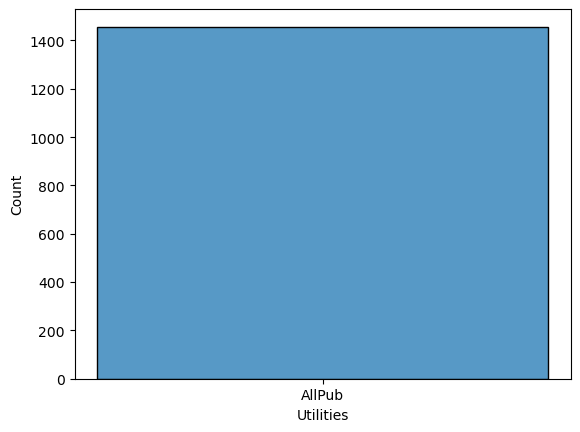

In [57]:
# Taking a look at the distribution

sns.histplot(te_d, x='Utilities');

In [58]:
# all the values are AllPub, we will fill nan with the same

te_d['Utilities'].fillna('AllPub', inplace=True)

In [59]:
te_d[ te_d['MSZoning'].isna() ]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
455,1916,30,NaN,109.0,21780,Grvl,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,None,None,None,None,0.0,None,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,None,Detchd,1975.0,Unf,NaN,NaN,TA,TA,N,119,24,0,0,0,0,None,None,None,0,3,2009,ConLD,Normal
756,2217,20,NaN,80.0,14584,Pave,None,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,None,None,None,None,0.0,None,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,Typ,0,None,Attchd,1952.0,Unf,NaN,NaN,Fa,Po,N,0,0,0,0,0,0,None,None,None,0,2,2008,WD,Abnorml
790,2251,70,NaN,60.0,56600,Pave,None,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5,1,1900,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Ex,Y,SBrkr,1150,686,0,1836,0.0,0.0,2,0,4,1,TA,7,Maj1,0,None,Detchd,1900.0,Unf,NaN,NaN,TA,Fa,N,0,0,0,0,0,0,None,None,None,0,1,2008,WD,Normal
1444,2905,20,NaN,125.0,31250,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,1,3,1951,1951,Gable,CompShg,CBlock,VinylSd,None,0.0,TA,Fa,CBlock,None,None,None,None,0.0,None,0.0,0.0,0.0,GasA,TA,Y,FuseA,1600,0,0,1600,0.0,0.0,1,1,3,1,TA,6,Mod,0,None,Attchd,1951.0,Unf,NaN,NaN,Fa,TA,N,0,0,135,0,0,0,None,None,None,0,5,2006,WD,Normal


In [60]:
# Taking a look at the distribution
te_d['MSZoning'].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [61]:
# Training to narrow the option
te_d.groupby(['Neighborhood','MSSubClass', 'Street'])['MSZoning'].describe()

count unique      top freq
Neighborhood MSSubClass Street                           
Blmngtn      20         Pave       2      1       RL    2
             120        Pave       9      2       RL    7
Blueste      120        Pave       3      1       RM    3
             160        Pave       5      1       RM    5
BrDale       160        Pave      14      1       RM   14
BrkSide      20         Pave       3      2       RL    2
             30         Pave       8      2       RM    5
             40         Pave       1      1       RL    1
             45         Pave       2      1       RM    2
             50         Pave      30      2       RM   25
             70         Pave       5      2       RL    3
             75         Pave       1      1       RL    1
ClearCr      20         Pave      10      1       RL   10
             50         Pave       1      1       RL    1
             60         Pave       2      1       RL    2
             80         Pave       1      1       RL    1
             150        Pave       1      1       RL    1
             190        Pave       1      1       RL    1
CollgCr      20         Pave      64      1       RL   64
             60         Pave      45      1       RL   45
             80         Pave       3      1       RL    3
             85         Pave       1      1       RL    1
             90         Pave       1      1       RM    1
             120        Pave       3      1       RM    3
Crawfor      20         Pave      13      1       RL   13
             30         Pave       2      1       RL    2
             50         Pave      12      1       RL   12
             60         Pave       1      1       RL    1
             70         Pave      12      1       RL   12
             80         Pave       2      1       RL    2
             90         Pave       2      1       RL    2
             120        Pave       7      1       RM    7
             190        Pave       1      1       RL    1
Edwards      20         Pave      35      1       RL   35
             30         Pave       6      1       RL    6
             40         Pave       1      1       RL    1
             50         Pave      19      1       RL   19
             60         Pave       6      1       RL    6
             70         Pave       2      1       RL    2
             75         Pave       1      1       RL    1
             80         Pave       5      1       RL    5
             85         Pave       2      1       RL    2
             90         Pave      10      1       RL   10
             120        Pave       2      1       RL    2
             160        Pave       1      1       RM    1
             180        Pave       3      1       RM    3
             190        Pave       1      1       RL    1
Gilbert      20         Grvl       1      1       RL    1
                        Pave      13      1       RL   13
             60         Pave      59      1       RL   59
             80         Pave      12      1       RL   12
             190        Pave       1      1       RL    1
IDOTRR       20         Pave       1      1  C (all)    1
             30         Grvl       2      2  C (all)    1
                        Pave      15      2       RM   11
             50         Grvl       1      1  C (all)    1
                        Pave      18      2       RM   16
             60         Pave       1      1       RM    1
             70         Grvl       1      1  C (all)    1
                        Pave       6      2       RM    5
             80         Pave       2      1       RM    2
             85         Pave       1      1       RM    1
             190        Pave       5      2       RM    3
MeadowV      120        Pave       2      1       RM    2
             160        Pave      14      1       RM   14
             180        Pave       4      1       RM    4
Mitchel      20         Pave      30      1       RL   30
             50         Pave 

In [62]:
# Fill nan taking in count 'Neighborhood','MSSubClass', 'Street'

te_d['MSZoning'] = ( te_d.groupby(['Neighborhood','MSSubClass', 'Street'])['MSZoning']
                    .transform( lambda x: x.fillna( pd.Series.mode(x)[0] )) )

# pd.Series.mode(x)[0] 
# mode = beacuse the column is categorical 
# [0] beacuse it has more than one mode

In [63]:
te_d['MSZoning'].value_counts()

RL         1115
RM          243
FV           74
C (all)      17
RH           10
Name: MSZoning, dtype: int64

In [64]:
# the output before impute

# RL         1114
# RM          242
# FV           74
# C (all)      15
# RH           10

SyntaxError: invalid syntax (441469901.py, line 3)

In [ ]:
te_d['MSZoning'].isna().sum()

In [66]:
tr_d.isna().sum().sum()

0

In [67]:
te_d.isna().sum().sum()

8

In [65]:
te_d.columns[ te_d.isna().sum()>0 ]

Index(['GarageCars', 'GarageArea'], dtype='object')